# The Role of Analytics in Human Resources

**Objectives**

Uncorver the factors that contribute to employer attrition rate
Provide reccommendations on areas to invest to decrease the rate of attrition
Create a Model to predict the probality of employer leaving the company

Data Source : Attached CSV File

**About the data**
This is a fictional data set created by IBM data scientists.

Education : 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating : 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance : 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [1]:
import pandas as pd # for tabular data manipulation
import numpy as np # for numeric computing
import matplotlib.pyplot as plt # for ploting /visualization
import matplotlib as matplot # visulization
import seaborn as sns # visualization

%matplotlib inline

**Read the data**

In [2]:
hrdata = pd.read_csv('C:/Users/shwet/OneDrive/Documents/pandas/HR_DataAnalysis/HR-Employee-Attrition.csv')
hrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Exploratory Data Analysis**

In [3]:
hrdata.shape

(1470, 35)

In [4]:
hrdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
## check for missing values from the datasets
hrdata.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

>There is no missing values from the dataset. This is because the datasets is a fictional dataset created by the IBM data scientist.



In [6]:
## Check for data type inconsistencies
hrdata.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

>There is consistency in the data type

There are 26 numeric columns and 9 discrete columns

<Axes: >

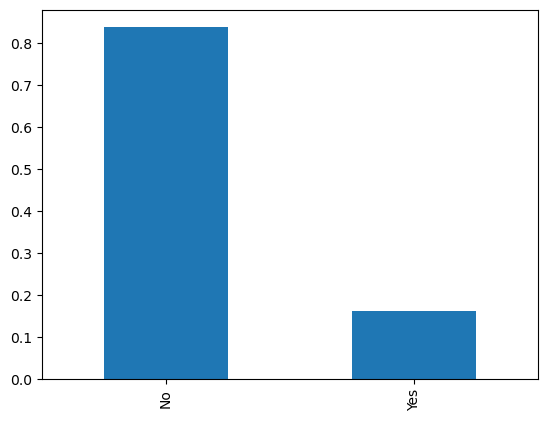

In [7]:
## calculate the attrition rate of the company.
attrition_rate = hrdata.Attrition.value_counts() / hrdata.shape[0]
attrition_rate.plot.bar()

>This is an imbalance datasets. 
>16% of the employer is classifield has YES in attrition rate while 83% is classifield as NO in the attrition rate.

In [8]:
## Summary statistics of the employer
hrdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [9]:
## diplay the mean summary of the attrition rate of the company, to observed the group difference
hrdata_summary = hrdata.groupby('Attrition')
hrdata_summary.mean(numeric_only=True).T

Attrition,No,Yes
Age,37.561233,33.607595
DailyRate,812.504461,750.362869
DistanceFromHome,8.915653,10.632911
Education,2.927007,2.839662
EmployeeCount,1.000000,1.000000
EmployeeNumber,1027.656123,1010.345992
EnvironmentSatisfaction,2.771290,2.464135
HourlyRate,65.952149,65.573840
JobInvolvement,2.770479,2.518987
JobLevel,2.145985,1.637131


In [10]:
## check the summary std
hrdata_summary.std(numeric_only=True).T

Attrition,No,Yes
Age,8.888360,9.689350
DailyRate,403.208379,401.899519
DistanceFromHome,8.012633,8.452525
Education,1.027002,1.008244
EmployeeCount,0.000000,0.000000
EmployeeNumber,606.217074,580.750572
EnvironmentSatisfaction,1.071132,1.169791
HourlyRate,20.380754,20.099958
JobInvolvement,0.692050,0.773405
JobLevel,1.117933,0.940594


In [11]:
## check the columns list
hrdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Correlation Matrix

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


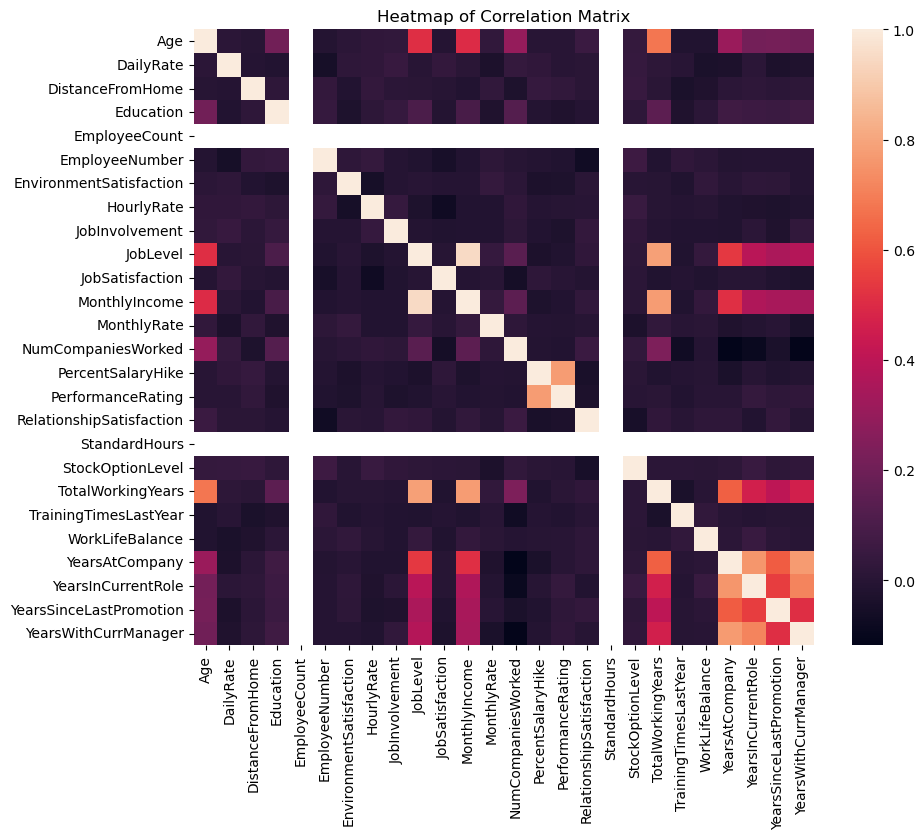

In [12]:
## create a correlation matrix

plt.figure(figsize=(10,8))

cor = hrdata.corr(numeric_only=True)

sns.heatmap(cor, xticklabels=cor.columns.values, yticklabels= cor.columns.values)
plt.title("Heatmap of Correlation Matrix")
cor

>Drop columns that are not useful

In [13]:
## Drop redundant columns
# 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate' : check if they are correlated
# 'StandardHours' : all values are 80
# 'Over18' : All the employer above 18

col_to_drop = ['EmployeeCount','EmployeeNumber','Over18', 'StandardHours']

In [14]:
hrdata.drop(['EmployeeCount','EmployeeNumber','Over18', 'StandardHours'], axis=1, inplace=True)

hrdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

>Repeat the correlation matrix

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


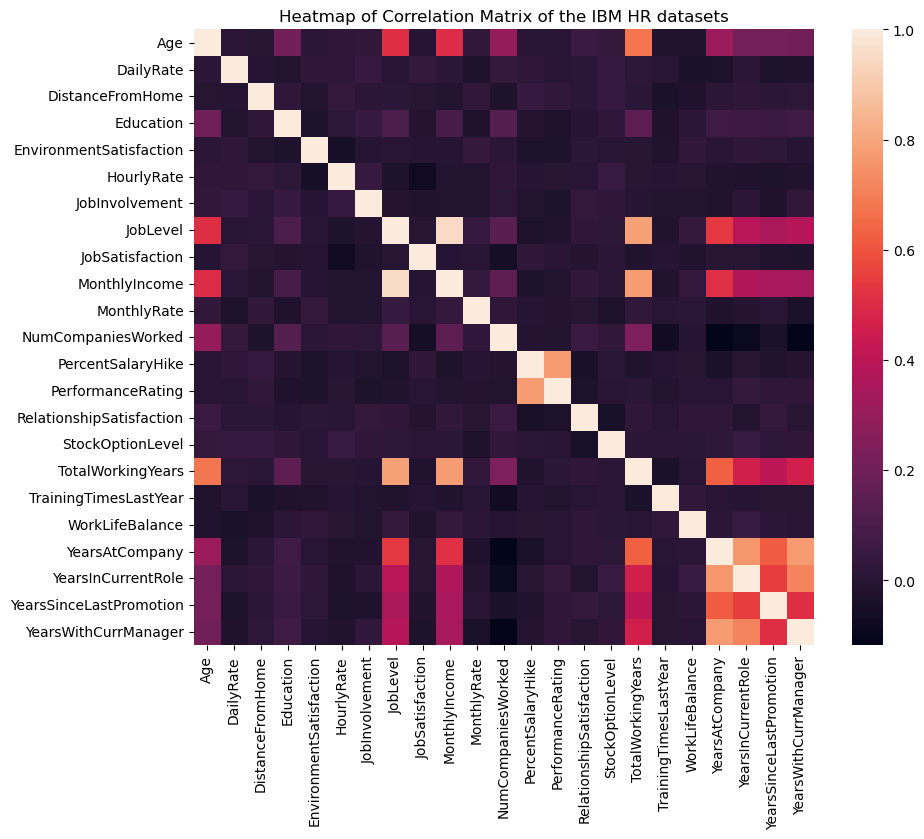

In [16]:
plt.figure(figsize=(10,8))
corr = hrdata.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)
plt.title("Heatmap of Correlation Matrix of the IBM HR datasets")
corr

**Change Attrition value to 0 : NO, 1 :YES**

**This will allow us to view the correlation between Attrition and other variables**

In [17]:
hrdata['Attrition'] = hrdata.Attrition.map(dict(Yes=1, No=0))
hrdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


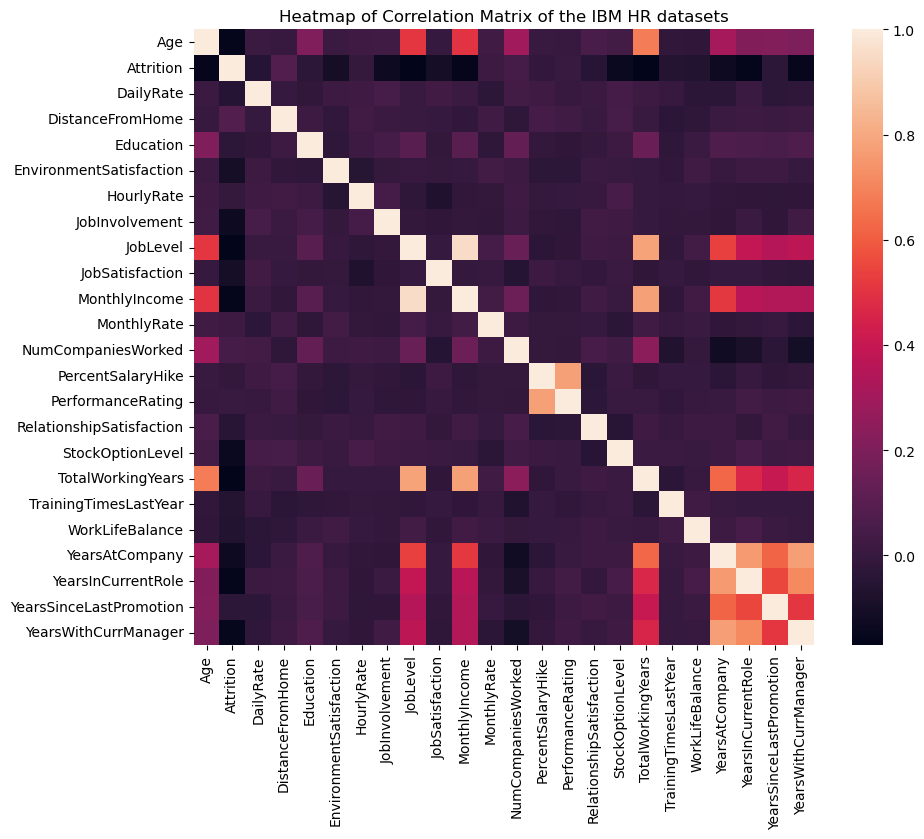

In [19]:
plt.figure(figsize=(10,8))
corr = hrdata.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels= corr.columns.values)
plt.title("Heatmap of Correlation Matrix of the IBM HR datasets")
corr

# Distribution of Age, MonthlyIncome, JobSatisfaction

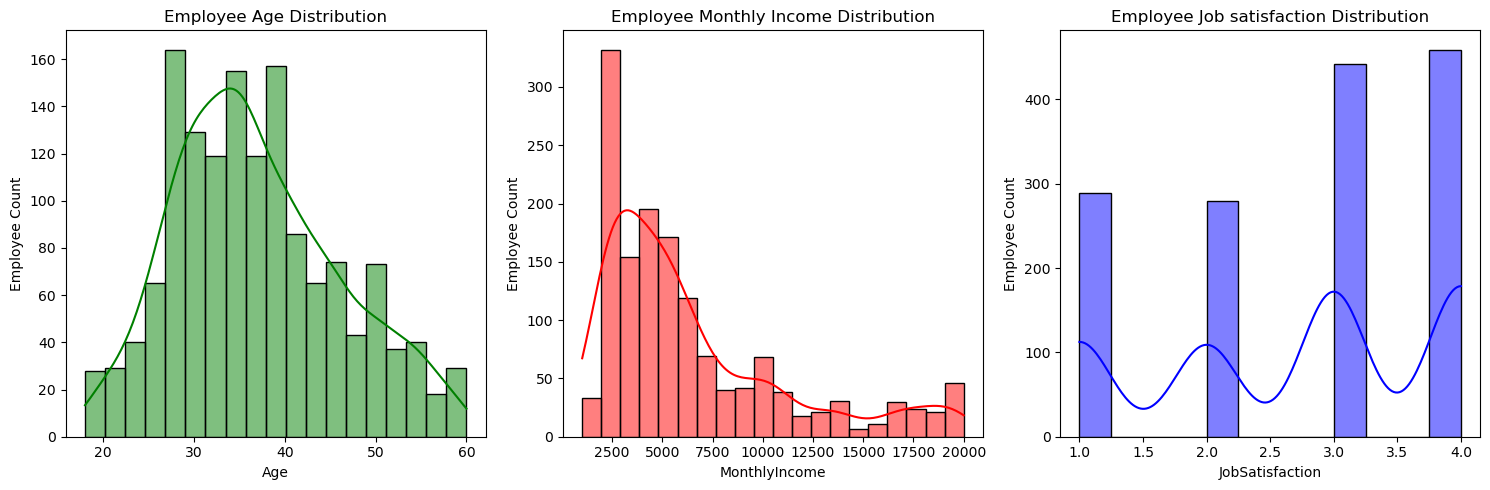

In [30]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Age graph
sns.histplot(hrdata.Age, kde=True, color="g", ax=axes[0]).set_title('Employee Age Distribution')
axes[0].set_ylabel('Employee Count')

# MonthlyIncome graph
sns.histplot(hrdata.MonthlyIncome, kde=True, color='r', ax=axes[1]).set_title('Employee Monthly Income Distribution')
axes[1].set_ylabel('Employee Count')

# JobSatisfaction graph
sns.histplot(hrdata.JobSatisfaction, kde=True, color='b', ax=axes[2]).set_title('Employee Job satisfaction Distribution')
axes[2].set_ylabel('Employee Count')

plt.tight_layout()
plt.show()

# Distribution of DailyRate, Education and DistanceFromeHome

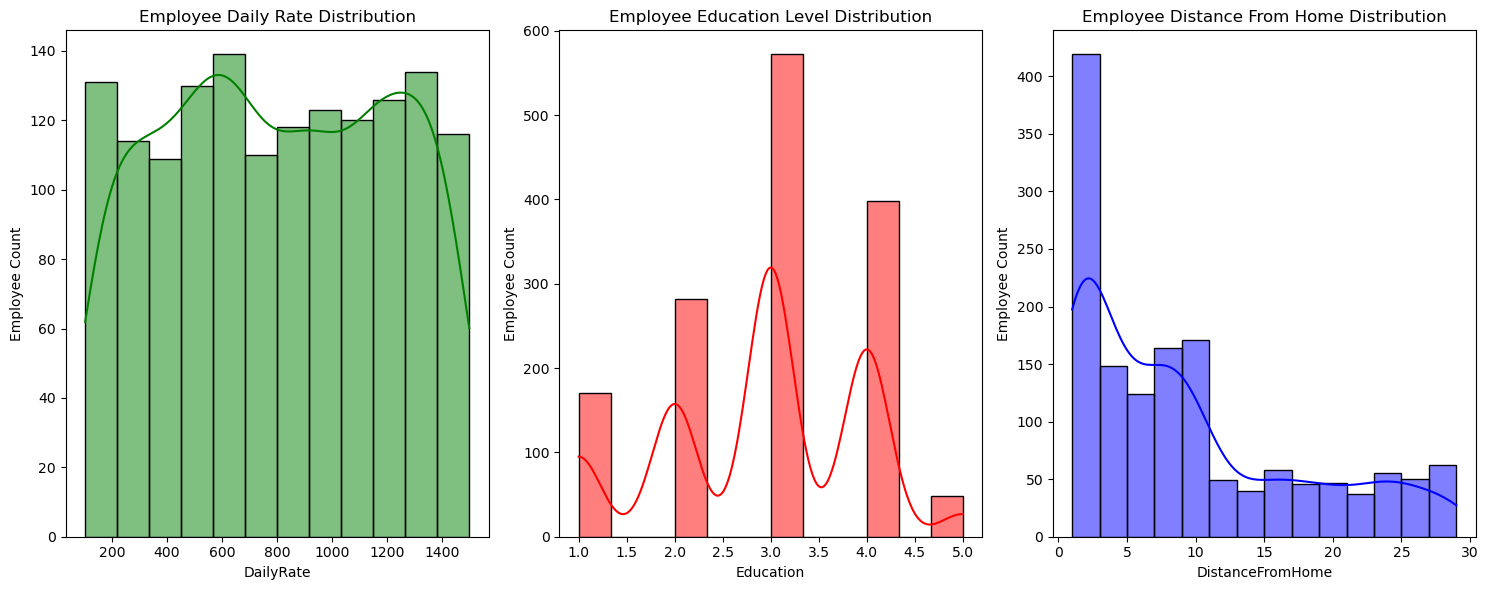

In [31]:
# Setup matplotlib figure
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

# DailyRate graph
sns.histplot(hrdata.DailyRate, kde=True, color="g", ax=axes[0]).set_title('Employee Daily Rate Distribution')
axes[0].set_ylabel('Employee Count')

# Education graph
sns.histplot(hrdata.Education, kde=True, color='r', ax=axes[1]).set_title('Employee Education Level Distribution')
axes[1].set_ylabel('Employee Count')

# Distance From Home graph
sns.histplot(hrdata.DistanceFromHome, kde=True, color='b', ax=axes[2]).set_title('Employee Distance From Home Distribution')
axes[2].set_ylabel('Employee Count')

plt.tight_layout()
plt.show()

# Age and Monthly Income

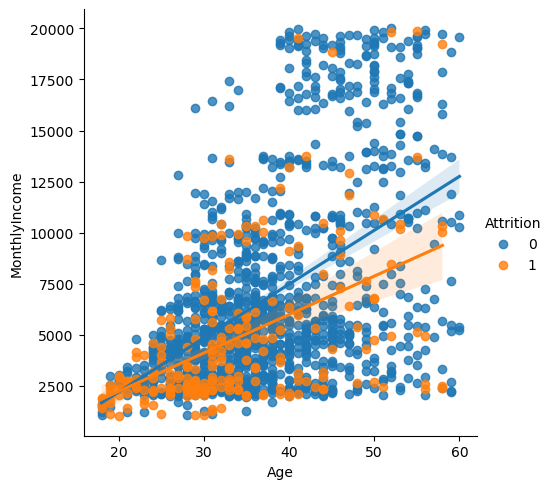

In [32]:
sns.lmplot(x='Age', y='MonthlyIncome', data=hrdata,fit_reg=True,hue='Attrition') 

**Employee with low monthly income and withing the Age of 18 to 35 are more likely to leave the company**


# Monthly Income and Job satisfaction

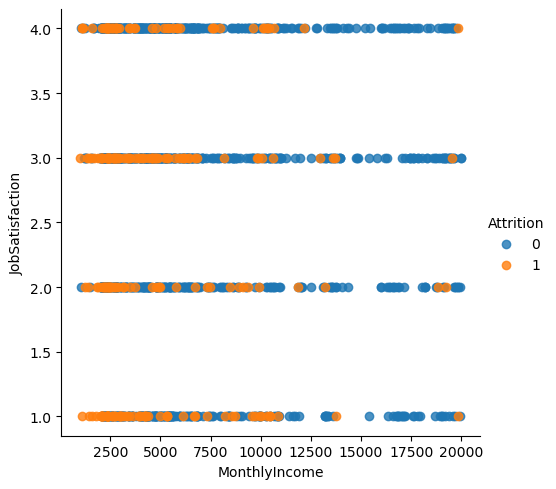

In [33]:
sns.lmplot(x='MonthlyIncome', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

**Employee with low monthly income inrespective of job Satisfaction are likely to leave the company**

# Job satisfaction and distance from home
**Is the distance a factor of job satisfation?**

# Performance rating and Job satisfaction

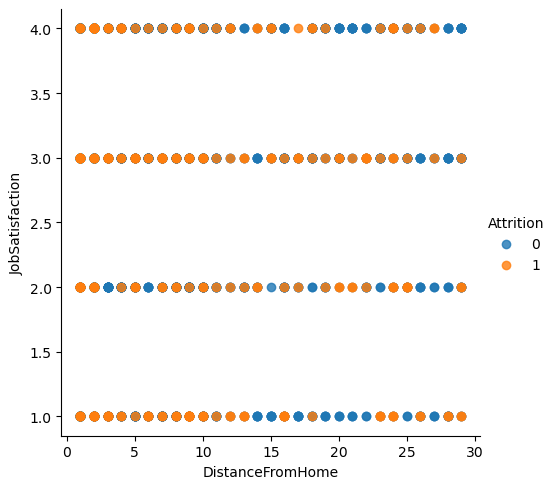

In [34]:
sns.lmplot(x='DistanceFromHome', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

# Age and Distance from home

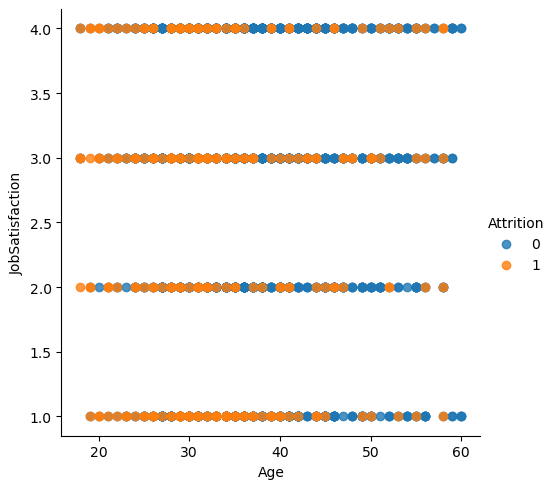

In [44]:
sns.lmplot(x='Age', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

# Performance rating and Job satisfaction

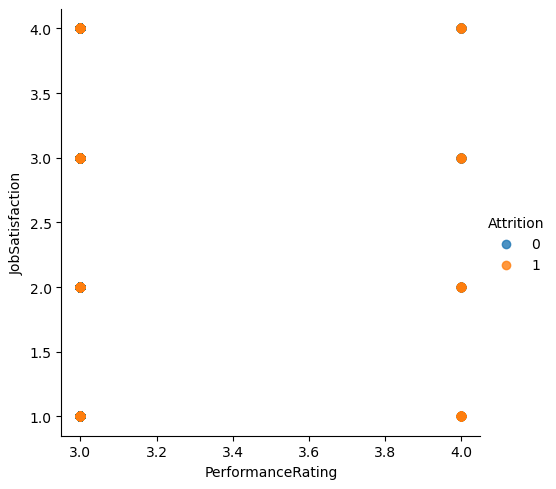

In [35]:
sns.lmplot(x='PerformanceRating', y='JobSatisfaction', data=hrdata, fit_reg=False, hue='Attrition')

# Employee JobSatisfaction

Text(0.5, 1.0, 'Employee Job Satisfaction Distribution - Attrition V.S. No Attrition')

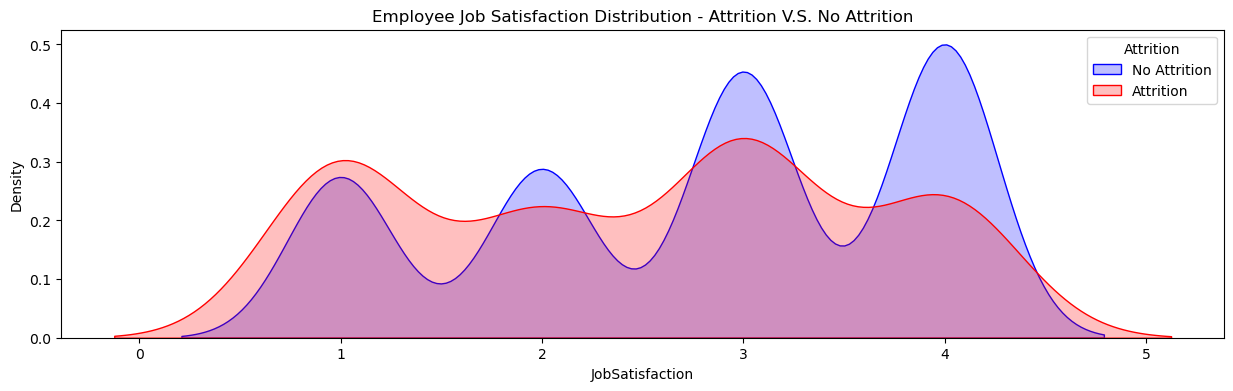

In [46]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 0),'JobSatisfaction'] , color='b',fill=True, label='No Attrition')
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 1),'JobSatisfaction'] , color='r',fill=True, label='Attrition')
# Add legend with labels
plt.legend(title='Attrition', labels=['No Attrition', 'Attrition'])
plt.title('Employee Job Satisfaction Distribution - Attrition V.S. No Attrition')

**Employee with lower job satisfation are likely to leave compared to employee with higher job satisfation**


# Employee Age

Text(0.5, 1.0, 'Employee Age Distribution - Attrition V.S. No Attrition')

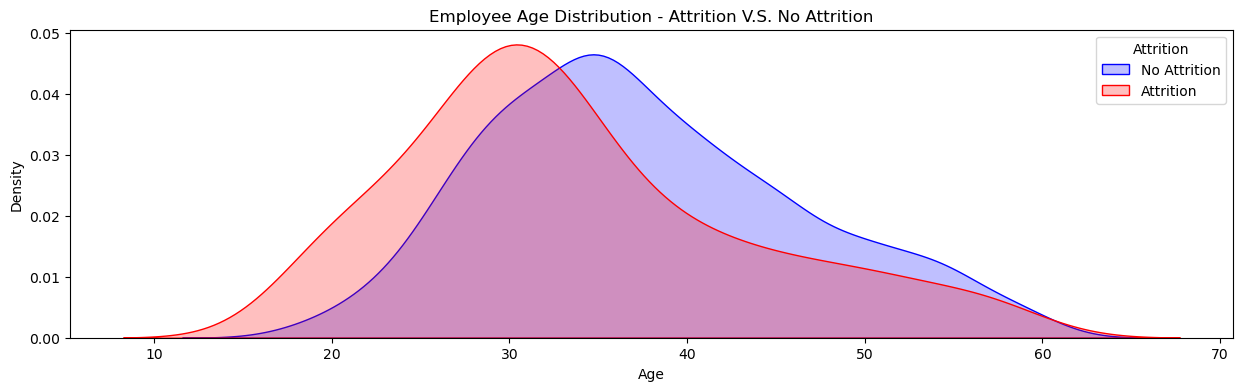

In [47]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 0),'Age'] , color='b',fill=True, label='No Attrition')
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 1),'Age'] , color='r',fill=True, label='Attrition')
plt.legend(title='Attrition', labels=['No Attrition', 'Attrition'])
plt.title('Employee Age Distribution - Attrition V.S. No Attrition')

# Monthly Income

Text(0.5, 1.0, 'Employee Monthly Income Distribution - Attrition V.S. No Attrition')

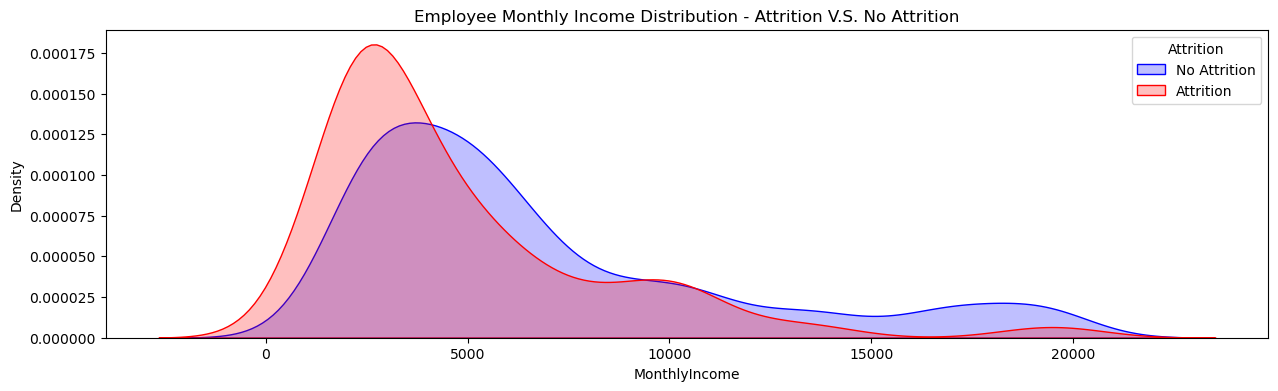

In [48]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 0),'MonthlyIncome'] , color='b',fill=True, label='No Attrition')
ax=sns.kdeplot(hrdata.loc[(hrdata['Attrition'] == 1),'MonthlyIncome'] , color='r',fill=True, label='Attrition')
plt.legend(title='Attrition', labels=['No Attrition', 'Attrition'])
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')

**Employee with low Monthly Income are likely to leave the company**

# Employee Monthly Income Distribution based on Overtime

[Text(0, 0.5, 'Percent')]

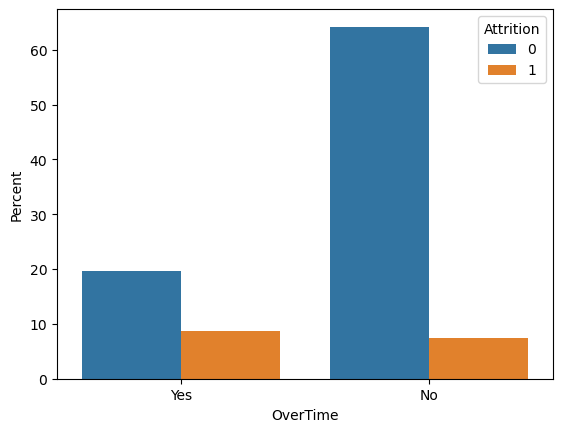

In [49]:
ax = sns.barplot(x="OverTime", y="MonthlyIncome", hue="Attrition", data=hrdata, estimator=lambda x: len(x) / len(hrdata) * 100)
ax.set(ylabel="Percent")